In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
K = 2

In [3]:
def cvt_local2global(local_point, sc_point):
    x, y, a = local_point.T
    X, Y, A = sc_point.T
    x1 = x * np.cos(A) - y * np.sin(A) + X
    y1 = x * np.sin(A) + y * np.cos(A) + Y
    a1 = (a + A) % (2 * np.pi)
    return np.array([x1, y1, a1]).T


def cvt_global2local(global_point, sc_point):
    x, y, a = global_point.T
    X, Y, A = sc_point.T
    x1 = x * np.cos(A) + y * np.sin(A) - X * np.cos(A) - Y * np.sin(A)
    y1 = -x * np.sin(A) + y * np.cos(A) + X * np.sin(A) - Y * np.cos(A)
    a1 = (a - A) % (2 * np.pi)
    return np.array([x1, y1, a1]).T

def find_src(global_point, local_point):
    x, y, a = local_point.T
    x1, y1, a1 = global_point.T
    A = (a1 - a) % (2 * np.pi)
    X = x1 - x * np.cos(A) + y * np.sin(A)
    Y = y1 - x * np.sin(A) - y * np.cos(A)
    return np.array([X, Y, A]).T

# Read data

In [13]:
points = np.load("odom_coords%d.npy"%K)
N = points.shape[0]

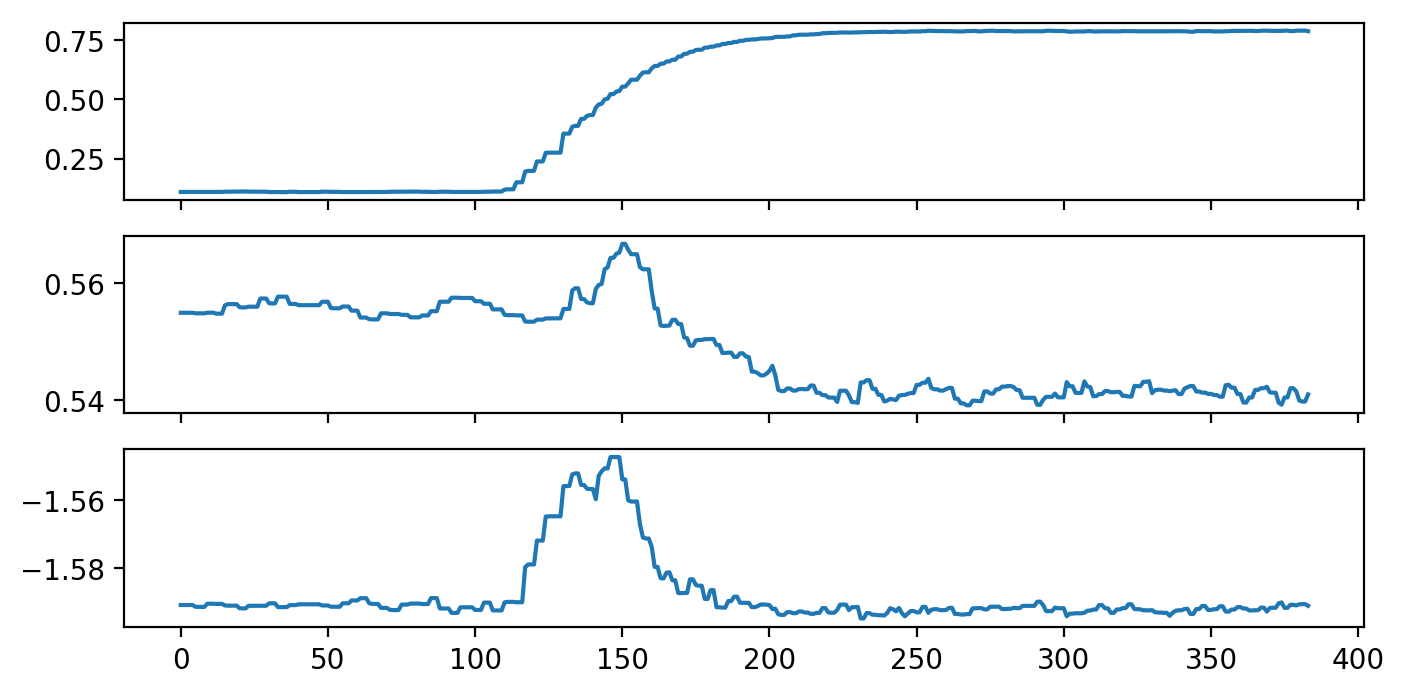

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(8, 4), dpi=200, sharex=True)
for i in range(3):
    ax[i].plot(points[:, i])
plt.show()

In [12]:
raw_vels = np.load("vel_cmd%d.npy"%K)
vels = []
for i in range(len(raw_vels)):
    if raw_vels[i] is None:
        vels.append([0, 0, 0])
    else:
        vels.append(raw_vels[i])
vels = np.array(vels)

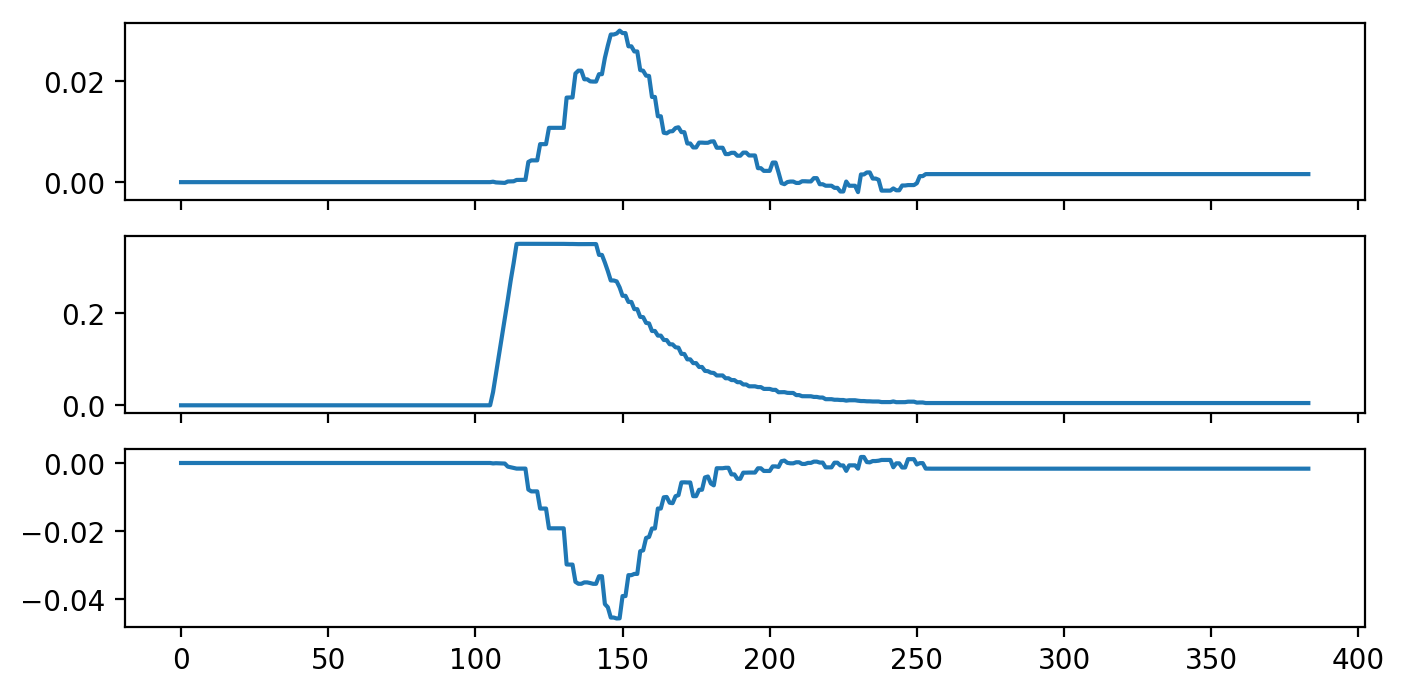

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(8, 4), dpi=200, sharex=True)
for i in range(3):
    ax[i].plot(vels[:, i])
#     ax[i].plot(vels[:, i])
plt.show()

# Show vels and coords

In [18]:
angles = points.copy()
angles[:, :2] = 0
vels_xy = cvt_local2global(vels, angles)
vels_xy[:, 2] = vels[:, 2]

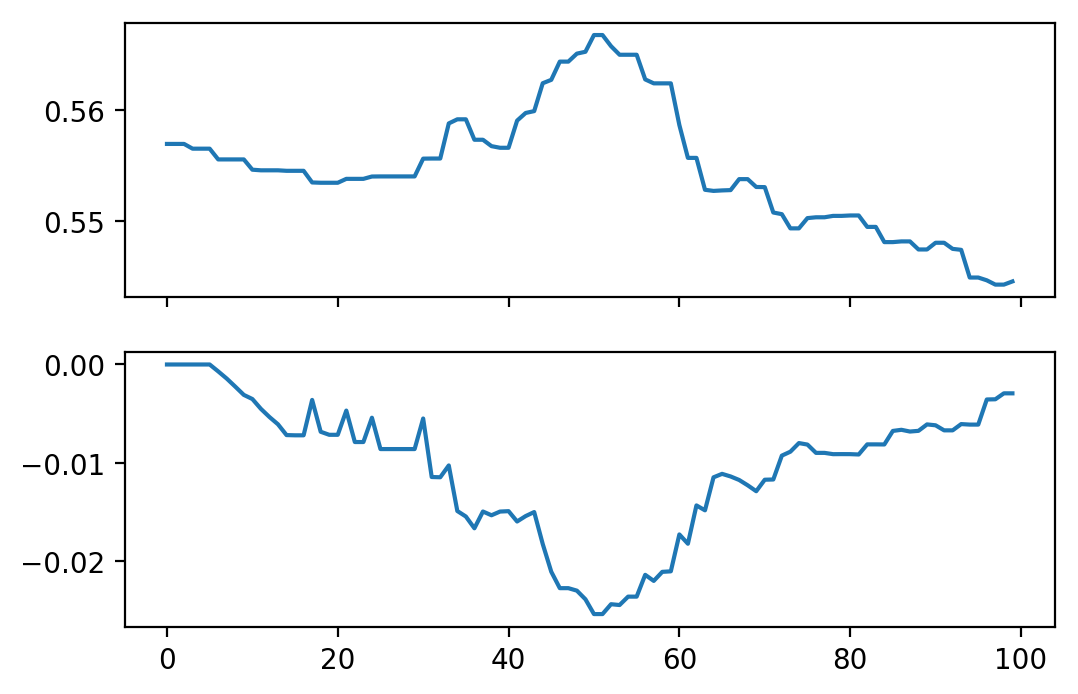

In [36]:
ind_start = 100
ind_end = 200
fig, ax = plt.subplots(2, 1, figsize=(6, 4), dpi=200, sharex=True)
ax[0].plot(points[ind_start:ind_end, 1])
# ax[0].plot(-(vels_xy[ind_start:ind_end, 2]) - 1.59)
ax[1].plot(vels_xy[ind_start:ind_end, 1])
# ax[1].plot(points[ind_start:ind_end, 1])

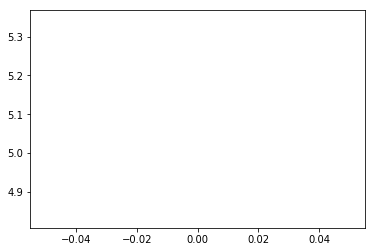

In [38]:
plt.plot(np.linalg.norm(vels_xy[ind_start:ind_end, :2]))

In [39]:
np.linalg.norm(vels_xy[ind_start:ind_end, :2])

5.087619824242979